Conventions <br>
$ \alpha_1 \rightarrow \texttt{alpha1},\quad 
\alpha_u \rightarrow \texttt{alpha\_u},\quad 
\alpha_* \rightarrow \texttt{alpha\_fp} $ <br>
$ \tilde{\alpha}_1 \rightarrow \texttt{Alpha1},\quad 
\tilde{\alpha}_u \rightarrow \texttt{Alpha\_u},\quad 
\tilde{\alpha}_* \rightarrow \texttt{Alpha\_fp} $ <br>

In [1]:
## imports
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random as r

C:\Users\Stijn Hennissen\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Beta functions
$$ \beta_u = 2u-\frac{3u^3}{2\pi (v+u)^3},\quad \beta_v = -\frac{u^2(7v+u)}{r\pi (v+u)^3} $$

In [2]:
## beta functions
def beta(u, v):
    return np.array([2*u - 3*u**3 / (2*math.pi*(v + u)**3), -u**2*(7*v + u) / (4*math.pi*(v + u)**3)])

NGFP
$$ (u_*,v_*) = (\frac{343}{288\pi},-\frac{49}{288\pi}) $$

In [3]:
## NGFP (beta functions = 0)
fp = np.array([343/(288*math.pi), -49/(288*math.pi)])

Stability coefficients
$$ \theta_1 = \frac{1}{3}(1+\sqrt{43}),\quad \tilde{\theta}_1 = \frac{1}{3}(1-\sqrt{43}) $$

In [4]:
## stability coefficients (eigenvalues)
theta1 = 1/3*(1 + 43**0.5)
Theta1 = 1/3*(1 - 43**0.5)

Eigenvectors
$$ V_1 = \Big( \frac{1}{21}(8+\sqrt{43}),1 \Big)^T,\quad \tilde{V}_1 = \Big( \frac{1}{21}(8-\sqrt{43}),1 \Big)^T $$

In [5]:
## eigenvectors
ev1 = np.array([1/21*(8 + 43**0.5),1]).transpose()
Ev1 = np.array([1/21*(8 - 43**0.5),1]).transpose()

Linear generating function
$$ F^*(u,v) = (172-137\sqrt{43})u + (215+44\sqrt{43})v + \frac{49(1003\sqrt{43}-989)}{288\pi} $$

In [6]:
## linear generating function
def F_fp(u,v):
    return (172 - 137*43**0.5)*u + (215 + 137*43**0.5)*v + 49*(1003*43**0.5 - 989)/(288*math.pi)

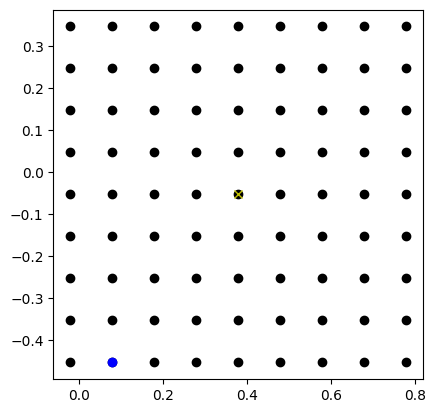

In [7]:
## generate grid of colocation points
nu, nv = (9, 9)
u = np.linspace(fp[0]-0.4, fp[0]+0.4, nu)
v = np.linspace(fp[1]-0.4, fp[1]+0.4, nv)
ug, vg = np.meshgrid(u, v)
N_p = nu*nv

# smoothness factor
sigma = 0.8/nu

# highlight test (v,u)
hl = np.array([0,1])

# plot colocation points
fig_grid = plt.figure()
ax_grid = fig_grid.add_subplot()
plt.plot(ug, vg, marker='o', color='k', linestyle='none')
plt.plot(fp[0], fp[1], marker='x', color='y')
plt.plot(ug[hl[0],hl[1]], vg[hl[0],hl[1]], marker='o', color='b')
ax_grid.set_aspect('equal', adjustable='box')
plt.show()

Basis functions (Multivariate Cauchy Distributions)
$$ \psi_i(u,v) = \Bigg( 1 + \sum_{\alpha}\frac{(u^{\alpha}-u^{\alpha}_{c,i})^2}{\sigma^2} + \sum_{\mu}\frac{(v^{\mu}-v^{\mu}_{c,i})^2}{\sigma^2} \Bigg)^{-1} $$

In [8]:
## generate less basis functions than colocation points

def idToCoord(id):
    # maps a 1D array of collocation point ids [0,...,N_p-1] to the coordinates on the grid
    # 4 9 14 19 24    4,0 4,1 4,2 4,3 4,4
    # 3 8 13 18 23    3,0 3,1 3,2 3,3 3,4
    # 2 7 12 17 22 -> 2,0 2,1 2,2 2,3 2,4
    # 1 6 11 16 21    1,0 1,1 1,2 1,3 1,4
    # 0 5 10 15 20    0,0 0,1 0,2 0,3 0,4
    return np.array([np.array([int(i%nu), int((i-(i%nu))/nu)]) for i in id])

def psi(jd, u, v):
    # returns basis functions for a 1D array of colocation point jds
    U = u*np.ones(jd.size)
    V = v*np.ones(jd.size)
    J = idToCoord(jd)
    return 1/(1 + np.square(U - ug[J[:,0],J[:,1]])/sigma**2 + np.square(V - vg[J[:,0],J[:,1]])/sigma**2)

def psi_i(jd, i):
    # returns basis functions for a 1D array of colocation point jds
    I = idToCoord(np.array([i]))
    return psi(jd, ug[I[0,0],I[0,1]], vg[I[0,0],I[0,1]])

#plt.figure()
#sns.heatmap(np.array([[psi(i+nu*j, fp[0], fp[1]) for i in range(0,nu)] for j in range(0,nv)]))

$$ \frac{\partial \psi_i}{\partial u^{\alpha}} = -2 \psi_i(u,v)^2 \sum_{\alpha} (u^{\alpha}-u^{\alpha}_{c,i}),\quad \frac{\partial \psi_i}{\partial v^{\mu}} = -2 \psi_i(u,v)^2 \sum_{\mu} (v^{\mu}-v^{\mu}_{c,i}) \quad ????????$$

In [9]:
## calculate derivatives of basis functions

def dpsi(jd, u, v):
    # returns derivatives of basis functions for a 1D array of colocation point jds
    U = u*np.ones(jd.size)
    V = v*np.ones(jd.size)
    J = idToCoord(jd)
    return np.array([ -2*(U - ug[J[:,0],J[:,1]])*np.square(psi(jd, u, v)), -2*(V - vg[J[:,0],J[:,1]])*np.square(psi(jd, u, v)) ])

def dpsi_i(jd, i):
    # returns derivatives of basis functions for a 1D array of colocation point jds
    I = idToCoord(np.array([i]))
    return dpsi(jd, ug[I[0,0],I[0,1]], vg[I[0,0],I[0,1]])

#sns.heatmap(np.array([[dpsi(i+nu*j, fp[0], fp[1])[0] for i in range(0,nu)] for j in range(0,nv)]))
#plt.figure()
#sns.heatmap(np.array([[dpsi(i+nu*j, fp[0], fp[1])[1] for i in range(0,nu)] for j in range(0,nv)]))

Generating function
$$ F_{\mu}(u,v) \approx \sum_{i=1}^{N} p_{\mu,i} \psi_i(u,v) $$

Master equation
$$ \sum_{\alpha} \frac{\partial F_{\mu}}{\partial u^{\alpha}} \beta^{\alpha} + \sum_{\nu} \frac{\partial F_{\mu}}{\partial v^{\nu}} \beta^{\nu} \Bigg\rvert_{(u^{\alpha}_{c,i},v^{\nu}_{c,i})} = 0 $$

In [10]:
## write master equation in terms of derivatives of basis functions
jd = np.array(list(range(0,N_p,3)))
N = jd.size
p = np.random.rand(N)

# precalculate psi; psi(i,j) for i'th colocation point evaluated in the j'th psi
pc_psi = np.array([psi_i(jd,i) for i in range(0,N_p)])

# precalculate dpsi; dpsi(i,2,j) for i'th colocation point evaluated in the j'th psi
pc_dpsi = np.array([dpsi_i(jd,i) for i in range(0,N_p)])

<AxesSubplot:>

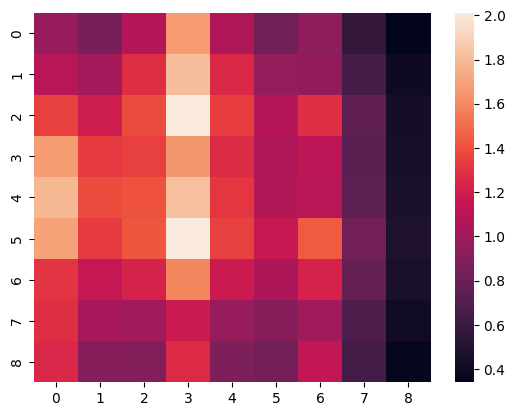

In [11]:
def F_i(i, p=p):
    # generating function evaluated at i'th colocation point
    return np.dot(p,pc_psi[i])

def F(u, v, p=p):
    # generating function evaluated at (u,v)
    return np.dot(p,psi(jd,u,v))

plt.figure()
sns.heatmap(np.array([[F_i(i+nu*j) for i in range(0,nu)] for j in range(0,nv)]))

<AxesSubplot:>

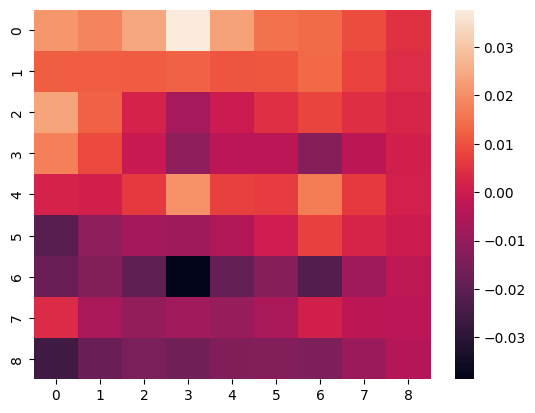

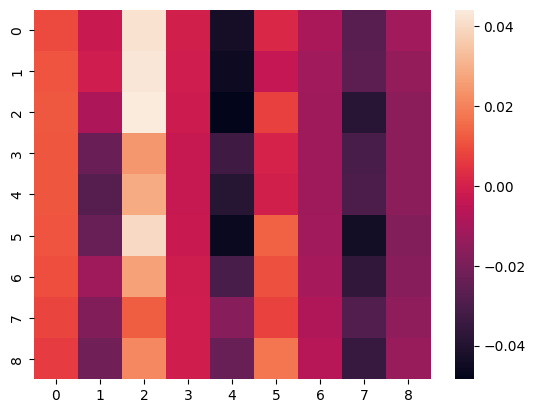

In [12]:
def dF_i(i, p=p):
    # derivative of generating function evaluated at i'th colocation point
    return np.array([np.dot(p,pc_dpsi[i,0,:]), np.dot(p,pc_dpsi[i,1,:])])

plt.figure()
sns.heatmap(np.array([[dF_i(i+nu*j)[0] for i in range(0,nu)] for j in range(0,nv)]))
plt.figure()
sns.heatmap(np.array([[dF_i(i+nu*j)[1] for i in range(0,nu)] for j in range(0,nv)]))

106.90350298042955


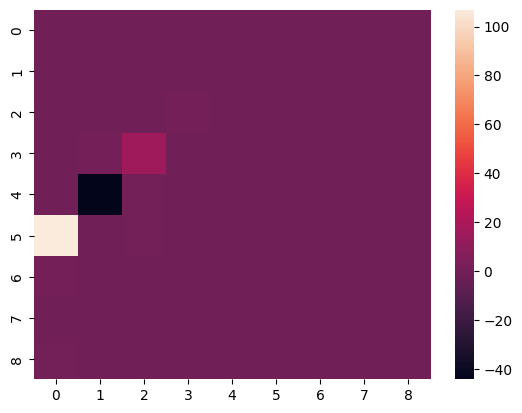

In [13]:
def master(i, p=p):
    # master equation evaluated at i'th colocation point
    I = idToCoord(np.array([i]))
    pc_beta = beta(ug[I[0,0],I[0,1]],vg[I[0,0],I[0,1]])
    pc_dF = dF_i(i,p)
    return pc_beta[0]*pc_dF[0]+pc_beta[1]*pc_dF[1]

plt.figure()
sns.heatmap(np.array([[master(i+nu*j) for i in range(0,nu)] for j in range(0,nv)]))

print(np.max(np.array([[master(i+nu*j) for i in range(0,nu)] for j in range(0,nv)])))

for n in range(0,N_p):
    m = master(n)
    if abs(m) >= 1000:
        print(f'{idToCoord(np.array([n]))} -> {m}')



In [29]:
## tune p s.t. all master equations go to 0

# population size should always be even to have crossover work
pop_size = 10000

# initilize population
pop = np.random.rand(pop_size, N)

# fitness function
def fitness(q):
    val = 0.0
    for i in range(0,N_p):
        val += abs(master(i,q))
    c=1
    for iq in q:
        if np.abs(iq) < max(q)*0.001:
            c += 1
    return val*100*c

scores = [fitness(q) for q in pop]

counter = 1
max_iter = 100000
print(f'{min(scores) > 0.001}, {counter < max_iter}, {sum(1 - scores/max(scores)) > 0}')
while min(scores) > 0.01 and counter < max_iter and sum(1 - scores/max(scores)) > 0:
    # selection
    if counter % 10 == 0:
        print(f'sum = {sum(1 - scores/max(scores))}')
    pop = r.choices(pop, weights=np.square(np.array(1 - scores/max(scores))), k=pop_size)

    # crossover and mutation
    for i in range(0,pop_size,2):
        R = r.randint(1,N)
        tmp = pop[i+1][:R].copy()
        pop[i+1][:R], pop[i][:R] = pop[i][:R], tmp
        mut_rate = 0.7
        if r.random() < mut_rate:
            # mutation happens; 
            max_mut_percent = 0.5/(math.log10(counter)+1)
            for j in np.random.randint(0,N-1,r.randint(1,N-1)):
                pop[i][j] += pop[i][j]*(r.random()-0.5)*2*max_mut_percent
                pop[i+1][j] += pop[i+1][j]*(r.random()-0.5)*2*max_mut_percent

    # score each individual in the generation
    scores = [fitness(q) for q in pop]
    if counter % 10 == 0:
        print(f'[{min(scores)},...,{max(scores)}]')
    
    counter += 1

print(f'{min(scores) > 0.01}, {counter < max_iter}, {sum(1 - scores/max(scores)) > 0}')
scores = [fitness(q) for q in pop]
print(min(scores))

    

True, True, True
sum = 8411.882378993574
[1521.6833560352927,...,71562.25522623403]
sum = 8826.595328556517
[979.9787040219771,...,127581.70836552093]
sum = 9487.743622470321
[875.3716743772065,...,652906.1507500451]
sum = 8962.277582227398
[1084.960595772092,...,405032.49981356005]
sum = 9387.24408998605
[476.0921632681566,...,619998.7996971614]
sum = 9341.796097754966
[769.2713393285709,...,2299055.157832822]
sum = 9284.790083052429
[733.3608857461213,...,745387.2843212798]
sum = 8279.804519361482
[330.9783387142911,...,188243.30410039116]
sum = 8182.319891405623
[226.63237380332276,...,47484.94587410364]
sum = 5484.223228334373
[208.08102090669382,...,5139.15650578219]
sum = 4183.075419231161
[94.46210564755434,...,208.26119255238922]
True, True, False
94.39518740847454


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1.]
0.0028676733031685053
-0.083


<AxesSubplot:>

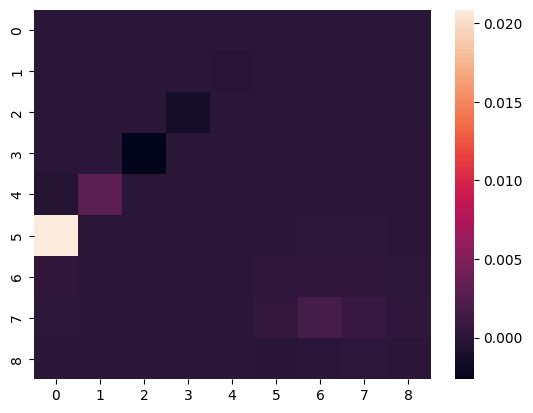

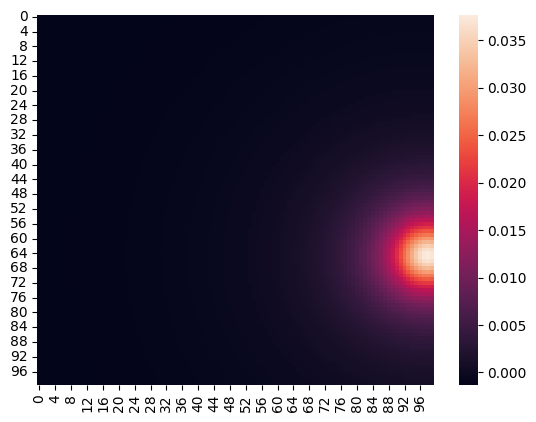

In [30]:
# evaluate F(0,v) = 0 to find v
p = pop[np.argmin(np.array(scores))]

print(np.round(p/max(p),decimals=3))

F_val = np.array([np.array([V/1000,np.abs(F(0,V/1000)-F(fp[0],fp[1]))]) for V in range(-5000,5000,1)])

print(min(F_val[:,1]))
print(F_val[np.argmin(F_val[:,1]),0])

plt.figure()
sns.heatmap(np.array([[master(i+nu*j,p) for i in range(0,nu)] for j in range(0,nv)]))

plt.figure()
sns.heatmap(np.array([[F(u/100,v/100,p)-F(fp[0],fp[1],p) for u in range(-20,80)] for v in range(-50,50)]))
